# Jacob Ridlinghafer
### Code Review #2
#### 11/23/2020

# Grade 
6/6 - Great work. I like all of your print statements along they way and also how you have all of your functions separated out in their own file. I appricatet how you provided all of the steps but I think you could probably shorten this notebook considerably not to explain all the intermediate steps. Also,from a user perspectiveI think some additional narration in your markdown cells would be nice. 

Additional notes for the future: 
- Add a block to the top of your code with all of the file reads
- Similiarly its good to have a block at the top where you set all of your user defined variables



### Step 1: import packages for the predictions as well as for graphing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.linear_model import LinearRegression
import numpy as np
import j_func as mf
import os

# for graphing
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
from shapely.geometry import Point
import contextily as ctx

C:\Users\Jakey\Anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


### Step 2: The next two cells analyse and import datasets and find relevant info (prate)

In [3]:
# Net CDF file historical time series
data_path = os.path.join('../../data',
                         'Prate.nc')

# Read in the dataset as an x-array
dataset = xr.open_dataset(data_path)
# shows prate is parameter of interest
dataset

<xarray.Dataset>
Dimensions:    (lat: 5, lon: 6, nbnds: 2, time: 2150)
Coordinates:
  * lat        (lat) float32 39.047 37.1422 35.2375 33.3328 31.4281
  * lon        (lon) float32 240.0 241.875 243.75 245.625 247.5 249.375
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2020-11-19
Dimensions without coordinates: nbnds
Data variables:
    prate      (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        Mon Nov 23 02:01:33 2020: ncrcat -O -d lat,30.000000,40.0...
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [4]:
# We can inspect the metadata of the file like this:
metadata = dataset.attrs
metadata

OrderedDict([('Conventions', 'COARDS'),
             ('title', 'mean daily NMC reanalysis (2014)'),
             ('history',
              'Mon Nov 23 02:01:33 2020: ncrcat -O -d lat,30.000000,40.000000 -d lon,240.000000,250.000000 -d time,0,2149 -n 6,4,1 /Datasets/ncep.reanalysis.dailyavgs/surface_gauss/prate.sfc.gauss.2015.nc /Public/www/X174.18.157.18.327.2.1.32.nc\ncreated 2013/12 by Hoop (netCDF2.3)'),
             ('description',
              'Data is from NMC initialized reanalysis\n(4x/day).  It consists of T62 variables interpolated to\npressure surfaces from model (sigma) surfaces.'),
             ('platform', 'Model'),
             ('dataset_title', 'NCEP-NCAR Reanalysis 1'),
             ('References',
              'http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html')])

### Step 3: find the closest lat and lon values to our site and seclude that data

In [6]:
# shows the list of values
print(dataset['prate']['lat'].values)
print(dataset['prate']['lon'].values)

[39.047  37.1422 35.2375 33.3328 31.4281]
[240.    241.875 243.75  245.625 247.5   249.375]


In [8]:
# Now lets take a slice: Grabbing data for just one point
# 34.56, 248.15
lat = dataset["prate"]["lat"].values[-2]
lon = dataset["prate"]["lon"].values[-2]
print("Long, Lat values:", lon, lat)

Long, Lat values: 247.5 33.3328


### Step 4: Graph to see general trends over the 5 year period and convert to units of inches per day in a data frame

C:\Users\Jakey\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


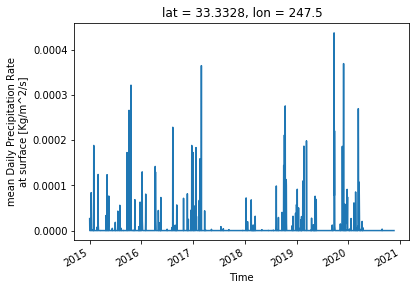

In [9]:
precip = dataset["prate"].sel(lat=lat, lon=lon)
precip.shape

# use x-array to plot timeseries
precip.plot.line()
precip_val = precip.values

# Convert to dataframe
precip = precip.to_dataframe()

# converts to inches/day
precip['prate'] = precip['prate'] * 86400 / 25.4


### Step 5: Repeated above process for max tempertature

In [10]:
# Second dataset
# Net CDF file historical time series
data_path = os.path.join('../../data',
                         'MaxT.nc')

# Read in the dataset as an x-array
dataset = xr.open_dataset(data_path)
# look at it shows that air is parameter of interest
dataset

<xarray.Dataset>
Dimensions:    (lat: 37, lon: 6, nbnds: 2, time: 2150)
Coordinates:
  * lat        (lat) float32 39.047 37.1422 35.2375 ... -27.6186 -29.5234
  * lon        (lon) float32 240.0 241.875 243.75 245.625 247.5 249.375
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2020-11-19
Dimensions without coordinates: nbnds
Data variables:
    tmax       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          daily NMC reanalysis (2014)
    history:        Mon Nov 23 01:58:29 2020: ncrcat -O -d lat,-30.000000,40....
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [11]:
# We can inspect the metadata of the file like this:
metadata = dataset.attrs
metadata

OrderedDict([('Conventions', 'COARDS'),
             ('title', 'daily NMC reanalysis (2014)'),
             ('history',
              'Mon Nov 23 01:58:29 2020: ncrcat -O -d lat,-30.000000,40.000000 -d lon,240.000000,250.000000 -d time,0,2149 -n 6,4,1 /Datasets/ncep.reanalysis.dailyavgs/surface_gauss/tmax.2m.gauss.2015.nc /Public/www/X174.18.157.18.327.1.58.28.nc\ncreated 2013/12 by Hoop (netCDF2.3)'),
             ('description',
              'Data is from NMC initialized reanalysis\n(4x/day).  It consists of T62 variables interpolated to\npressure surfaces from model (sigma) surfaces.'),
             ('platform', 'Model'),
             ('dataset_title', 'NCEP-NCAR Reanalysis 1'),
             ('References',
              'http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html')])

In [12]:
print(dataset['tmax']['lat'].values)
print(dataset['tmax']['lon'].values)

[ 39.047     37.1422    35.2375    33.3328    31.4281    29.5234
  27.6186    25.7139    23.8092    21.9044    19.9997    18.095
  16.1902    14.2855    12.3808    10.47604    8.57131    6.66657
   4.76184    2.8571     0.952368  -0.952368  -2.8571    -4.76184
  -6.66657   -8.57131  -10.47604  -12.3808   -14.2855   -16.1902
 -18.095    -19.9997   -21.9044   -23.8092   -25.7139   -27.6186
 -29.5234  ]
[240.    241.875 243.75  245.625 247.5   249.375]


In [13]:
# 248.15, 34.56
# Now lets take a slice: Grabbing data for just one point
lat = dataset["tmax"]["lat"].values[2]
lon = dataset["tmax"]["lon"].values[-2]
print("Long, Lat values:", lon, lat)

Long, Lat values: 247.5 35.2375


### The graph below shows extremely oscilatory behavior as you'd expect from temperature

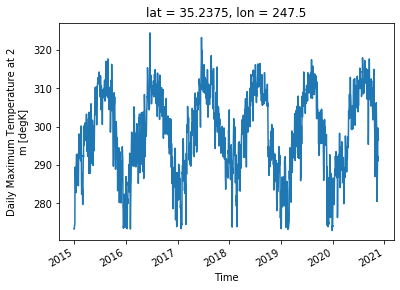

In [14]:
temp = dataset["tmax"].sel(lat=lat, lon=lon)

# use x-array to plot timeseries
temp.plot.line()
precip_val = temp.values

# Conver to dataframe
temp = temp.to_dataframe()

# converts to celcius
temp['tmax'] = temp['tmax'] - 273.15

### Step 6: importing USGS streamflow data and compiling the above two dataframes all into one place

In [15]:
# Replace parts of url with variables
site = '09506000'
start = '2015-01-01'
end = '2020-11-21'  # Update end date each week to Saturday

url = "https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=" + \
    site + "&referred_module=sw&period=&begin_date=" + start + "&end_date=" + \
    end
data = pd.read_table(url, skiprows=30, names=['agency_cd', 'site_no',
                                              'datetime', 'flow', 'code'],
                     parse_dates=['datetime'])

data = data.reset_index(drop=True)
precip = precip.reset_index(drop=True)
temp = temp.reset_index(drop=True)
data = data.join(precip['prate'])
data = data.join(temp['tmax'])

info = [data['datetime'], data["flow"], temp["tmax"], precip['prate']]

headers = ['datetime', "flow", "temp", "precip"]

data2 = pd.concat(info, axis=1, keys=headers)
pd.to_datetime(data2['datetime'])

data2['year'] = pd.DatetimeIndex(data2['datetime']).year
data2['month'] = pd.DatetimeIndex(data2['datetime']).month
data2['day'] = pd.DatetimeIndex(data2['datetime']).day

### Step 7: Resample data on a weekly basis and shift all variables 

    Note: data from times where flow is influenced by large floods is excluded, otherwise predictions would be far to high.

In [16]:
# Aggregate flow values to weekly
flow_weekly = data2.resample("W-SAT", on='datetime').mean()
# picked 800 where I had been using 345 but predictions had been too low
flow_weekly = flow_weekly[(flow_weekly.flow <= 800)]

In [17]:
for i in range(1, 4):
    flow_weekly['flow_tm%s' % i] = flow_weekly['flow'].shift(i)
# done for temp as well
for i in range(1, 3):
    flow_weekly['temp%s' % i] = flow_weekly['temp'].shift(i)
# done for precip as well
for i in range(1, 3):
    flow_weekly['precip%s' % i] = flow_weekly['precip'].shift(i)

### Step 8: Set a training period for the data to use in the linear regression model

In [18]:
train = flow_weekly[3:-13][['flow', 'flow_tm1', 'flow_tm2', 'flow_tm3',
                            'precip', 'temp',
                            'temp1', 'precip1']]

In [19]:
model4 = LinearRegression()
y = train['flow'].values
x4 = train[['flow_tm1', 'flow_tm2', 'flow_tm3',
            'precip', 'temp', 'temp1']]
model4.fit(x4, y)
r_sq = model4.score(x4, y)
# Print model parameters and r2
print('coefficient of determination:', np.round(r_sq, 2))
print('intercept:', np.round(model4.intercept_, 2))
print('slope:', np.round(model4.coef_, 2))

coefficient of determination: 0.51
intercept: 156.6
slope: [ 4.2000e-01  9.0000e-02  6.0000e-02  1.9853e+02 -1.8900e+00 -1.5700e+00]


### Step 9: Gather known data and forecasted data to use as inputs into model to run for 2 weeks

In [20]:
weeklypred = []
T = [18.41, 20.67]
T2 = [25.43, 18.41]
P = [0, 0]
lastweekx3 = [flow_weekly.flow[-3]]
lastweekx2 = [flow_weekly.flow[-2]]
lastweek = [flow_weekly.flow[-1]]
# empty list for predictions
weeklypred_4 = []

wk = 2
mf.prediction(wk, lastweek, lastweekx2, lastweekx3,
              P, T, T2, model4.intercept_, model4.coef_, weeklypred)

The prediction for week 1 is 168.88 cfs and week 2 is 182.64 cfs


### Step 10: for a long term seasonal period make a weekly quantile prediction for temperature
    Note: q = 10 was selected due to the extremely hot/ dry weather we had this summer

In [21]:
weeklytemp = []
for i in range(8, 13):
    q = 0.9
    weeklytemp.append(data2['temp'][(data2['month'] == i)
                                    & (data2['day'] <= 7)].quantile(q))
    weeklytemp.append(data2['temp'][(data2['month'] == i) & (data2['day'] > 7) &
                                    (data2['day'] <= 14)].quantile(q))
    weeklytemp.append(data2['temp'][(data2['month'] == i) & (data2['day'] > 14)
                                    & (data2['day'] <= 21)].quantile(q))
    weeklytemp.append(data2['temp'][(data2['month'] == i)
                                    & (data2['day'] >= 22)].quantile(q))
weeklytemp = weeklytemp[3:19]

# copied then temp 1 week prior to semester start
# is inserted at begining of list
weeklytemp2 = weeklytemp.copy()
weeklytemp2[0:0] = [41.2]

# rounding
weeklytemp = np.round(weeklytemp, decimals=2)
weeklytemp2 = np.round(weeklytemp, decimals=2)

### Step 11: Is similar to Step 9 but uses historical records to determine T and recent flow

In [22]:
# projecting 16 weeks into the future
# The + 13 is added to start at 8/21

P = [0]
lastweekx3 = [flow_weekly.flow[-(3 + 13)]]
lastweekx2 = [flow_weekly.flow[-(2 + 13)]]
lastweek = [flow_weekly.flow[-(1 + 13)]]
weeklypred = []
wk = 13

mf.pred_sem(lastweek, lastweekx2, lastweekx3, P, weeklytemp,
            weeklytemp2, model4.intercept_, model4.coef_, weeklypred)

### Step 12: create a graph of predicted flow (blue dots) compared with observed flow (orange dots)

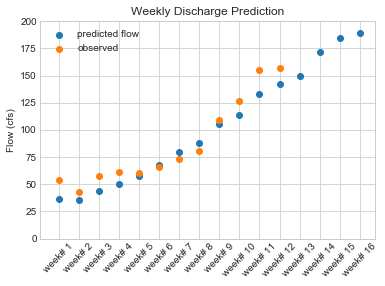

In [23]:
# creates a plot of my prediction for each week of the semester
weeks = []

for i in range(16):
    weeks.append('week# ' '%s' % (i+1))

plt.style.use('seaborn-whitegrid')

plt.scatter(x=weeks, y=weeklypred, marker='o', label='predicted flow')
plt.scatter(x=weeks[0:12],
            y=flow_weekly.flow[(flow_weekly['year'] == 2020)
            & (flow_weekly['month'] >= 8) & (flow_weekly['day'] >= 20) |
            (flow_weekly['year'] == 2020) & (flow_weekly['month'] >= 9)],
            marker='o', label='observed')

plt.ylabel('Flow (cfs)')
plt.ylim([0, 200])
plt.title('Weekly Discharge Prediction')
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.savefig('Discharge_Prediction.png')

### Step 13: Start to make a map starting with USGS stream gages

In [24]:
# Gauges II USGS stream gauge dataset:
# Download here:
# https://water.usgs.gov/GIS/metadata/usgswrd/XML
# /gagesII_Sept2011.xml#stdorder

# Reading it using geopandas
file = os.path.join('../../data', 'gagesII_9322_sept30_2011.shp')
gages = gpd.read_file(file)

# Zoom  in and just look at AZ
gages.columns
gages.STATE.unique()
gages_AZ = gages[gages['STATE'] == 'AZ']

### Step 14: find HUC boundaries (basin boundaries)

In [25]:
# adding HUC boundaries
# Watershed boundaries for the lower colorado
file = os.path.join('../../data', 'WBD_15_HU2_GDB.gdb')
fiona.listlayers(file)
HUC6 = gpd.read_file(file, layer="WBDHU6")

### Step 15: Get Arizona state boundaries to make boundaries more clear to the eye.

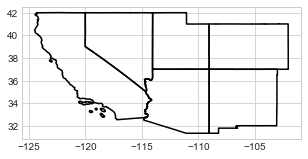

In [26]:
# importing boundary of states close to arizona
# https://catalog.data.gov/dataset/usgs-national-boundary-dataset-nbd
# -for-arizona-20171220-state-or-territory-filegdb-10-14ecfe
file = os.path.join('../../data', 'GOVTUNIT_Arizona_State_GDB.gdb')
fiona.listlayers(file)
statebound = gpd.read_file(file, layer="GU_StateOrTerritory")

# plotting boundary
fig, ax = plt.subplots(figsize=(5, 5))
# statebound.plot(ax=ax)
# ax.set_title("statebound")
statebound.boundary.plot(ax=ax, color=None,
                         edgecolor='black', linewidth=1.5)
plt.show()

In [27]:
# Add some point
# STream gauge:  34.44833333, -111.7891667
point_list = np.array([[-111.7891667, 34.44833333]])

# make these into spatial features
point_geom = [Point(xy) for xy in point_list]
point_geom

# mape a dataframe of the site
point_df = gpd.GeoDataFrame(point_geom, columns=['geometry'],
                            crs=HUC6.crs)

# Step 16: convert to similar cordinate system and map
Note: The next cell does not work in Jupyter (works in vscode just fine) for some reason on my computer I tryed several different itterations of this, but could not get anything to work. since the graphs require this step I just decided to insert the graphs this created below the code.

In [ ]:
# combination map of all 5 layers
fig, ax = plt.subplots(figsize=(8, 8))
HUC6_project.boundary.plot(ax=ax, color=None, label='HUC boundaries',
                           edgecolor='grey', linewidth=1.1)
gages_AZ.plot(column='DRAIN_SQKM', categorical=False, label='gages',
              legend=True, markersize=25, cmap='brg',
              ax=ax)
points_project.plot(ax=ax, color='c', marker='*', label='site-gage',
                    markersize=345)
statebounds.boundary.plot(ax=ax, color=None, label='stateline',
                          edgecolor='black', linewidth=1.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs={'init': 'epsg:4326'})
plt.ylim(31, 38)
plt.xlim(-115, -109)
ax.legend()

![](assets/AZ.png)

### Zooming in on the basin and adding a topographic map to show geological features

In [ ]:
# shows the basin contributing to our river
fig, ax = plt.subplots(figsize=(8, 8))
HUC6_project.boundary.plot(ax=ax, color=None, label='HUC boundaries',
                           edgecolor='black', linewidth=1.5)
gages_AZ.plot(column='DRAIN_SQKM', categorical=False, label='gages',
              legend=True, markersize=25, cmap='brg',
              ax=ax)
points_project.plot(ax=ax, color='c', marker='*', label='site-gage',
                    markersize=345)
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap, crs={'init': 'epsg:4326'})
plt.ylim(33.5, 36)
plt.xlim(-113.25, -111)
ax.legend()

![](assets/Basin.png)